In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### для уравнений движения и линейной системы смотреть файл "task5_3.pdf"

#### запишем матрицу A при k = 1, M/m = 2 (M = 1)

In [2]:
main_diag = [4, 2] * 500
upper = [-2, -1] * 499 + [-2]
lower = [-1, -2] * 499 + [-1]

In [5]:
a_0 = np.diag(main_diag)
a_1 = np.diag(upper, k=1)
a_2 = np.diag(lower, k=-1)
A = a_0 + a_1 + a_2
A[0, 999] = -2
A[999, 0] = -1

In [7]:
A

array([[ 4, -2,  0, ...,  0,  0, -2],
       [-1,  2, -1, ...,  0,  0,  0],
       [ 0, -2,  4, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  2, -1,  0],
       [ 0,  0,  0, ..., -2,  4, -2],
       [-1,  0,  0, ...,  0, -1,  2]])

#### найдём собственные значения

In [9]:
eigvalA, eigvecA = np.linalg.eig(A)

(array([219., 104., 102.,  75.,   0.,   0.,  75., 102., 104., 219.]),
 array([7.57834878e-16, 6.00000000e-01, 1.20000000e+00, 1.80000000e+00,
        2.40000000e+00, 3.00000000e+00, 3.60000000e+00, 4.20000000e+00,
        4.80000000e+00, 5.40000000e+00, 6.00000000e+00]),
 <a list of 10 Patch objects>)

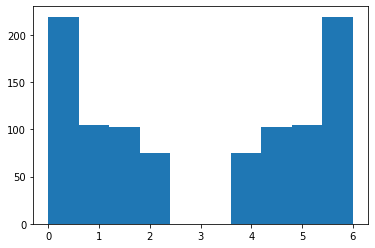

In [10]:
plt.hist(eigvalA)

#### а теперь возьмём корень, чтобы найти частоты

(array([ 67.,  70.,  70.,  76.,  88., 129.,   0.,   0., 187., 313.]),
 array([2.75288009e-08, 2.44948999e-01, 4.89897971e-01, 7.34846942e-01,
        9.79795914e-01, 1.22474489e+00, 1.46969386e+00, 1.71464283e+00,
        1.95959180e+00, 2.20454077e+00, 2.44948974e+00]),
 <a list of 10 Patch objects>)

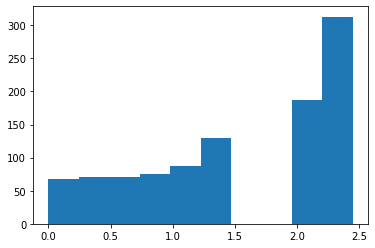

In [11]:
plt.hist(np.sqrt(eigvalA))

#### на гистограммах явно видно запрещённую область энергий

#### посмотрим теперь на моды вблизи границ спектра

In [15]:
maxVec = eigvecA.T[eigvalA.argmax()]
minVec = eigvecA.T[eigvalA.argmin()]

Text(0.5, 1.0, 'Мода, соответствующая максимальной энергии')

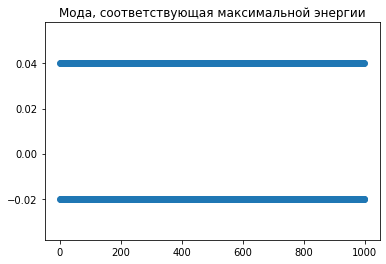

In [20]:
plt.scatter(np.arange(len(maxVec)), maxVec)
plt.title('Мода, соответствующая максимальной энергии')

Text(0.5, 1.0, 'Мода, соответствующая минимально энергии')

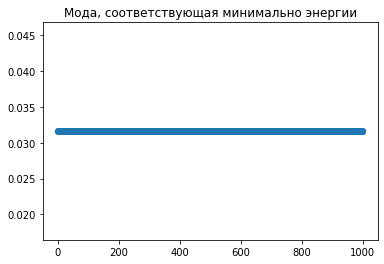

In [21]:
plt.scatter(np.arange(len(minVec)), minVec)
plt.title('Мода, соответствующая минимально энергии')

#### теперь рассмотрим матрицу со случайным k из нормального распределения на отрезке [0,1]

In [61]:
k = np.random.uniform(1,10)
Ak = k * A

In [62]:
eigvalAk, eigvecAk = np.linalg.eig(Ak)

(array([219., 104., 102.,  75.,   0.,   0.,  75., 102., 104., 219.]),
 array([5.71409887e-15, 2.02187341e+00, 4.04374682e+00, 6.06562022e+00,
        8.08749363e+00, 1.01093670e+01, 1.21312404e+01, 1.41531139e+01,
        1.61749873e+01, 1.81968607e+01, 2.02187341e+01]),
 <a list of 10 Patch objects>)

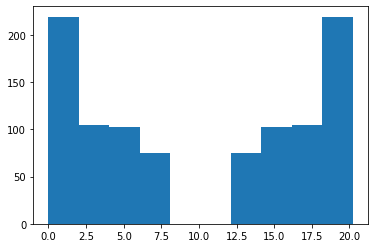

In [63]:
plt.hist(eigvalAk)

(array([ 67.,  70.,  70.,  76.,  88., 129.,   0.,   0., 187., 313.]),
 array([7.55916587e-08, 4.49652535e-01, 8.99304994e-01, 1.34895745e+00,
        1.79860991e+00, 2.24826237e+00, 2.69791483e+00, 3.14756729e+00,
        3.59721975e+00, 4.04687221e+00, 4.49652467e+00]),
 <a list of 10 Patch objects>)

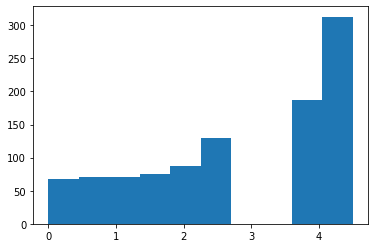

In [64]:
plt.hist(np.sqrt(eigvalAk))

#### в сравнении с первоначальной матрицей:

(array([ 67.,  70.,  70.,  76.,  88., 129.,   0.,   0., 187., 313.]),
 array([2.75288009e-08, 2.44948999e-01, 4.89897971e-01, 7.34846942e-01,
        9.79795914e-01, 1.22474489e+00, 1.46969386e+00, 1.71464283e+00,
        1.95959180e+00, 2.20454077e+00, 2.44948974e+00]),
 <a list of 10 Patch objects>)

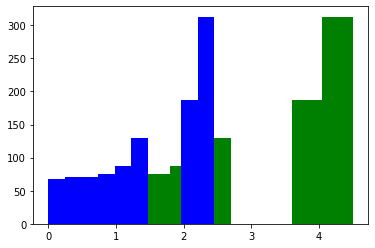

In [65]:
plt.hist(np.sqrt(eigvalAk), color='green')
plt.hist(np.sqrt(eigvalA), color='blue')

(array([219., 104., 102.,  75.,   0.,   0.,  75., 102., 104., 219.]),
 array([7.57834878e-16, 6.00000000e-01, 1.20000000e+00, 1.80000000e+00,
        2.40000000e+00, 3.00000000e+00, 3.60000000e+00, 4.20000000e+00,
        4.80000000e+00, 5.40000000e+00, 6.00000000e+00]),
 <a list of 10 Patch objects>)

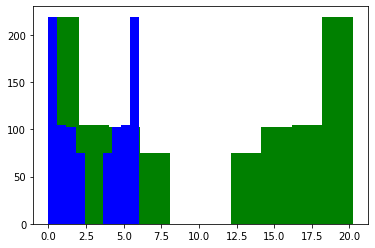

In [66]:
plt.hist(eigvalAk, color='green')
plt.hist(eigvalA, color='blue')

#### посмотрим на пространственную структуры моды из середины спектра

In [67]:
eigIndex = int(len(eigvalAk)/2)
randomVec = eigvecAk.T[eigIndex]

Text(0.5, 1.0, 'Мода из середины спектра для k = 3.37')

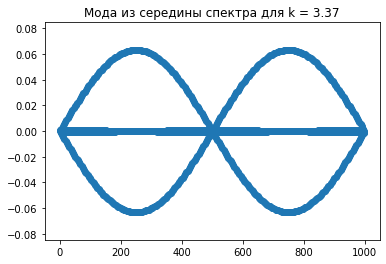

In [68]:
plt.scatter(np.arange(len(randomVec)), randomVec)
plt.title('Мода из середины спектра для k = {:.2f}'.format(k))

#### рассмотрим центральную часть чуть поближе

(400, 600)

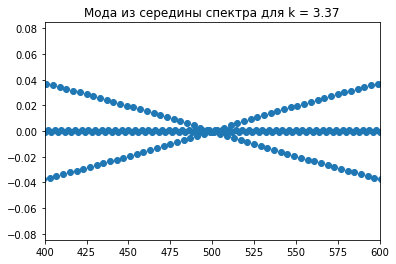

In [69]:
plt.scatter(np.arange(len(randomVec)), randomVec)
plt.title('Мода из середины спектра для k = {:.2f}'.format(k))
plt.xlim(400, 600)

#### а теперь возьмём несколько случайных мод

Text(0.5, 1.0, 'Мода для $\\omega = $ 4.13')

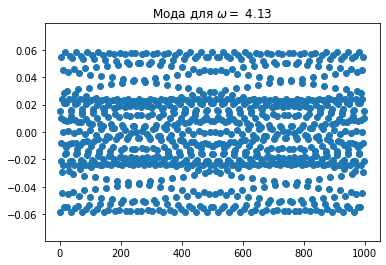

In [82]:
eigRandom = np.random.randint(0, len(eigvalAk))
randomVecNew = eigvecAk.T[eigRandom]
plt.scatter(np.arange(len(randomVecNew)), randomVecNew)
plt.title('Мода для $\omega = $ {:.2f}'.format(np.sqrt(eigvalAk[eigRandom]), k))

Text(0.5, 1.0, 'Мода для $\\omega = $ 0.81')

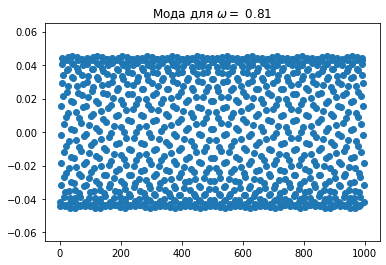

In [83]:
eigRandom = np.random.randint(0, len(eigvalAk))
randomVecNew = eigvecAk.T[eigRandom]
plt.scatter(np.arange(len(randomVecNew)), randomVecNew)
plt.title('Мода для $\omega = $ {:.2f}'.format(np.sqrt(eigvalAk[eigRandom]), k))

Text(0.5, 1.0, 'Мода для $\\omega = $ 4.27')

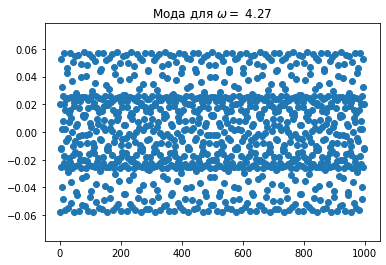

In [84]:
eigRandom = np.random.randint(0, len(eigvalAk))
randomVecNew = eigvecAk.T[eigRandom]
plt.scatter(np.arange(len(randomVecNew)), randomVecNew)
plt.title('Мода для $\omega = $ {:.2f}'.format(np.sqrt(eigvalAk[eigRandom]), k))

Text(0.5, 1.0, 'Мода для $\\omega = $ 4.49')

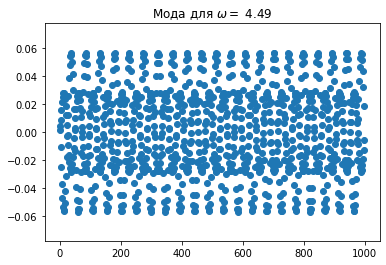

In [85]:
eigRandom = np.random.randint(0, len(eigvalAk))
randomVecNew = eigvecAk.T[eigRandom]
plt.scatter(np.arange(len(randomVecNew)), randomVecNew)
plt.title('Мода для $\omega = $ {:.2f}'.format(np.sqrt(eigvalAk[eigRandom]), k))

Text(0.5, 1.0, 'Мода для $\\omega = $ 0.19')

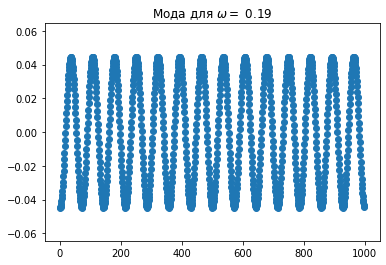

In [87]:
eigRandom = np.random.randint(900, len(eigvalAk))
randomVecNew = eigvecAk.T[eigRandom]
plt.scatter(np.arange(len(randomVecNew)), randomVecNew)
plt.title('Мода для $\omega = $ {:.2f}'.format(np.sqrt(eigvalAk[eigRandom]), k))

Text(0.5, 1.0, 'Мода для $\\omega = $ 4.49')

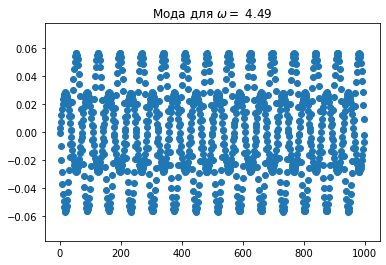

In [88]:
eigRandom = np.random.randint(0, 100)
randomVecNew = eigvecAk.T[eigRandom]
plt.scatter(np.arange(len(randomVecNew)), randomVecNew)
plt.title('Мода для $\omega = $ {:.2f}'.format(np.sqrt(eigvalAk[eigRandom]), k))